In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries
from datetime import datetime
import requests
import io


## Getting Covid Data

In [3]:
death_cases = pd.read_csv(
    "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
confirm_cases = pd.read_csv(
    "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")


In [4]:
death_cases.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/16/22,4/17/22,4/18/22,4/19/22,4/20/22,4/21/22,4/22/22,4/23/22,4/24/22,4/25/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7676,7678,7679,7680,7680,7680,7680,7681,7682,7683
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3496,3496,3496,3496,3496,3496,3496,3496,3496,3496
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6874,6874,6874,6874,6874,6874,6874,6874,6875,6875
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,153,153,153,153,153,153,153,153,153,153
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1900,1900,1900,1900,1900,1900,1900,1900,1900,1900


In [5]:
#Converting Row to Column

dates = confirm_cases.columns[4:]
confirmed_df_long = confirm_cases.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],
    value_vars=dates,
    var_name='Date',
    value_name='Confirmed'
)
confirmed_df_long['Date'] = confirmed_df_long['Date'].astype('datetime64')
deaths_df_long = death_cases.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],
    value_vars=dates,
    var_name='Date',
    value_name='Deaths'
)
deaths_df_long['Date'] = deaths_df_long['Date'].astype('datetime64')

# Merging confirmed_df_long and deaths_df_long
full_table = confirmed_df_long.merge(
    right=deaths_df_long,
    how='left',
    on=['Province/State', 'Country/Region', 'Date', 'Lat', 'Long']
)


# Sum of Confirmed and Death Cases = confirmed + deaths
full_table['Sum of Cases'] = full_table['Confirmed'] + full_table['Deaths']

full_table

#Grouping by Country and Date
covid_final_dataset = full_table.groupby(['Date', 'Country/Region'])['Confirmed', 'Deaths', 'Sum of Cases'].sum().reset_index()

#covid_final_dataset= covid_final_dataset.iloc[:, 1:]
covid_final_dataset

#covid_final_dataset.to_csv('Covid_Data.csv')


C:\Users\rishi\AppData\Local\Temp/ipykernel_21208/1125354362.py:33: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  covid_final_dataset = full_table.groupby(['Date', 'Country/Region'])['Confirmed', 'Deaths', 'Sum of Cases'].sum().reset_index()


,Date,Country/Region,Confirmed,Deaths,Sum of Cases
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
163345,2022-04-25,West Bank and Gaza,656876,5657,662533
163346,2022-04-25,Winter Olympics 2022,535,0,535
163347,2022-04-25,Yemen,11818,2149,13967
163348,2022-04-25,Zambia,319316,3976,323292


## Getting Stock Data

In [6]:
API_key='QSRWWT6220U36A7Z'
# American Market
stock_am='SPY'

# Canadian Market
stock_ca='EWC'

# Travel Sector
stock_tr='AWAY'

# The Real Estate Sector
stock_re='XLRE'

# Precious metals
stock_pm='SLV'

stocks_data = []

stocks_data.append(stock_am)
stocks_data.append(stock_ca)
stocks_data.append(stock_tr)
stocks_data.append(stock_re)
stocks_data.append(stock_pm)

 

def API(stock):
    api = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&outputsize=full&apikey="+API_key+"&datatype=csv"+"&symbol="+stock
    urldata = requests.get(api).content
    stock_df = pd.DataFrame(pd.read_csv(io.StringIO(urldata.decode('utf-8'))))
    if('timestamp' in stock_df):          
          stock_df = stock_df.rename(columns={'timestamp': 'Date'})
          stock_df = stock_df.rename(columns={'high': stock+'_high'})
          stock_df = stock_df.rename(columns={'low': stock+'_low'})
          stock_df = stock_df.rename(columns={'close': stock+'_close'})
          stock_df['Date'] = stock_df['Date'].astype('datetime64')
          stock_df[stock] = stock
          return stock_df     


df1 = pd.concat([API(st) for st in stocks_data],sort=True).sort_index()
merge_result_StockData = pd.merge(covid_final_dataset, df1, on=['Date'])
stockdata_df=merge_result_StockData.fillna("NA")
print(stockdata_df)
stockdata_df.to_csv('stocks_test.csv')

             Date Country/Region  Confirmed  Deaths  Sum of Cases  AWAY  \
0      2020-01-22    Afghanistan          0       0             0    NA   
1      2020-01-22    Afghanistan          0       0             0    NA   
2      2020-01-22    Afghanistan          0       0             0    NA   
3      2020-01-22    Afghanistan          0       0             0    NA   
4      2020-01-22        Albania          0       0             0    NA   
...           ...            ...        ...     ...           ...   ...   
561127 2022-04-25       Zimbabwe     247598    5468        253066    NA   
561128 2022-04-25       Zimbabwe     247598    5468        253066  AWAY   
561129 2022-04-25       Zimbabwe     247598    5468        253066    NA   
561130 2022-04-25       Zimbabwe     247598    5468        253066    NA   
561131 2022-04-25       Zimbabwe     247598    5468        253066    NA   

       AWAY_close AWAY_high AWAY_low  EWC  ...  SPY SPY_close SPY_high  \
0              NA        

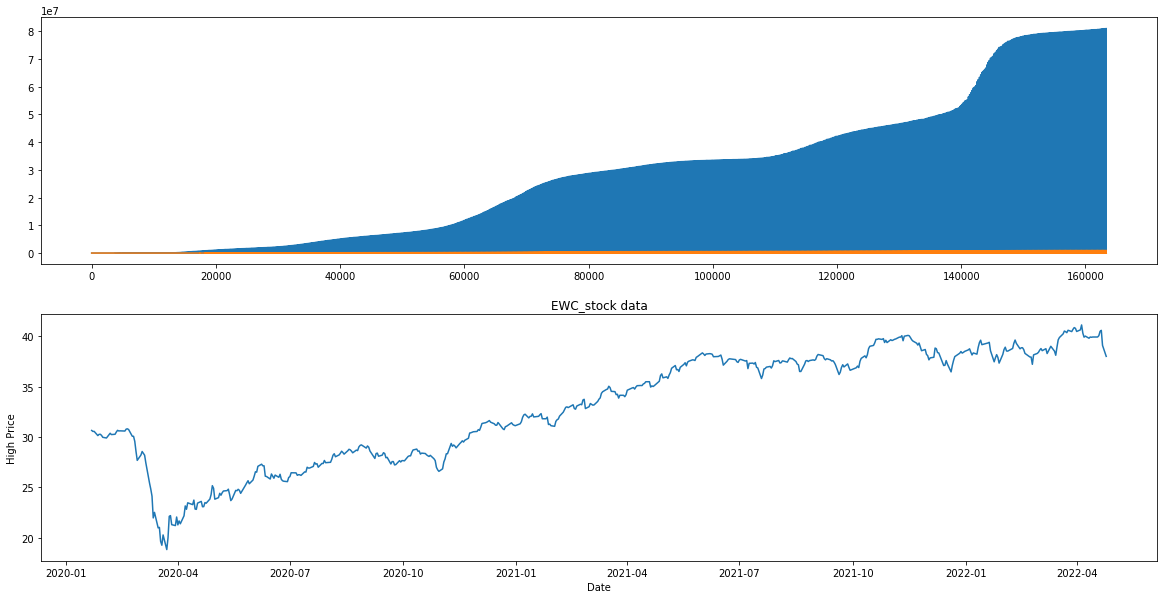

In [7]:
confirm_data=covid_final_dataset['Confirmed']
deaths_data= covid_final_dataset['Deaths']
EWC_stock=stockdata_df.loc[stockdata_df['EWC'] != 'NA']

plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.plot(confirm_data)
plt.plot(deaths_data)

plt.subplot(2,1,2)
plt.plot(EWC_stock['Date'], EWC_stock['EWC_high'],label='EWC')
plt.xlabel("Date")
plt.ylabel("High Price")
plt.title("EWC_stock data")
plt.show()


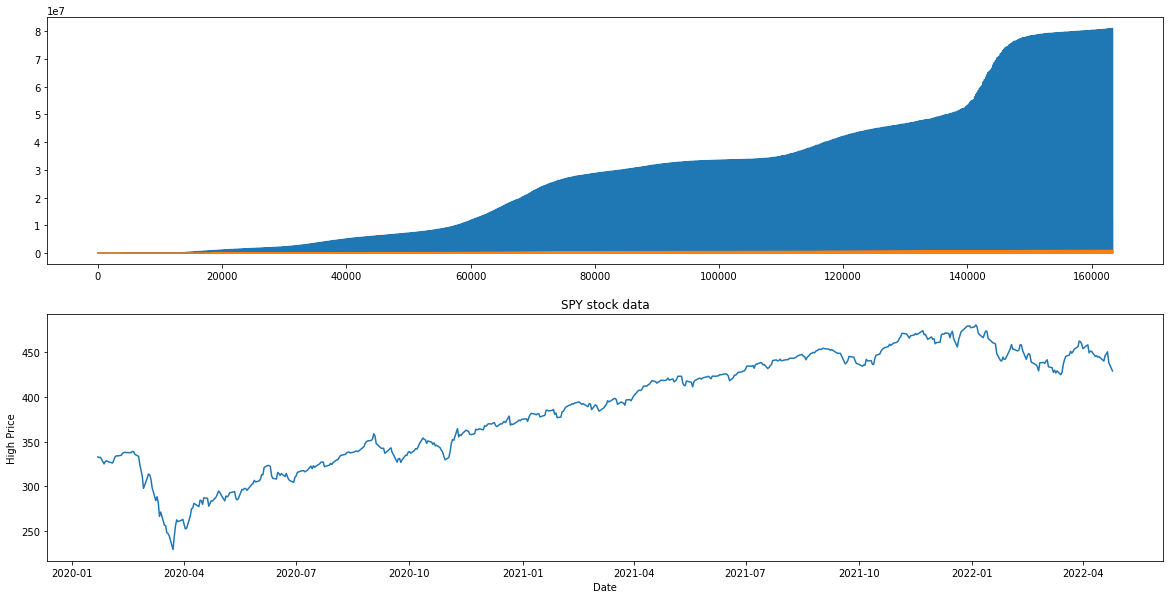

In [8]:
confirm_data=covid_final_dataset['Confirmed']
deaths_data= covid_final_dataset['Deaths']
SPY_stock=stockdata_df.loc[stockdata_df['SPY'] != 'NA']
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.plot(confirm_data)
plt.plot(deaths_data)


plt.subplot(2,1,2)
plt.plot(SPY_stock['Date'], SPY_stock['SPY_high'])

plt.xlabel("Date")
plt.ylabel("High Price")
plt.title("SPY stock data")
plt.show()

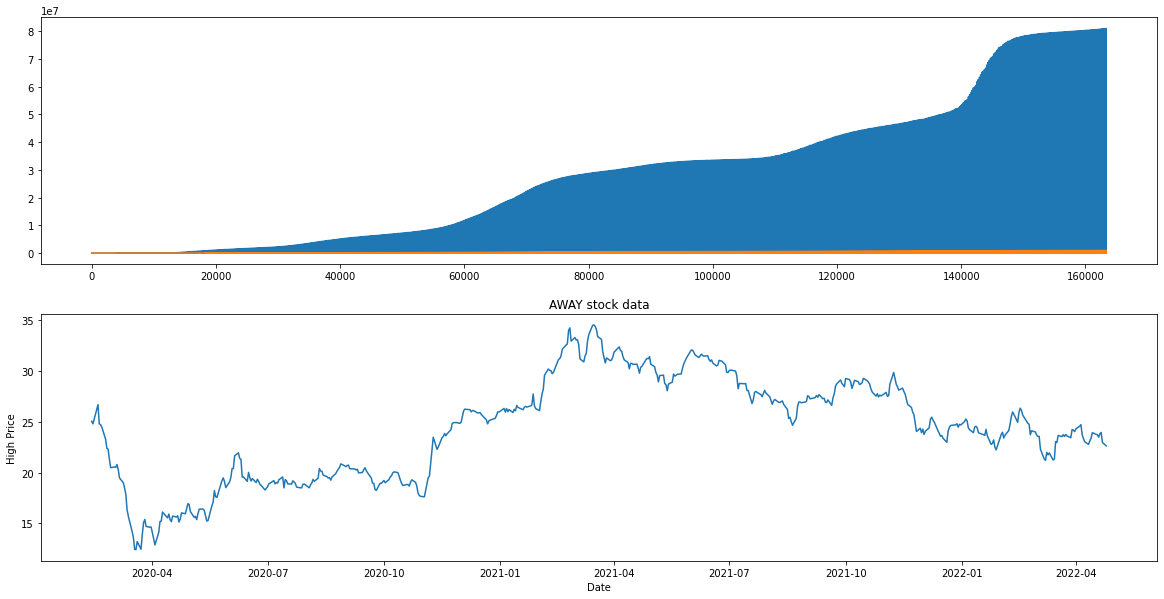

In [9]:
confirm_data=covid_final_dataset['Confirmed']
deaths_data= covid_final_dataset['Deaths']
AWAY_stock=stockdata_df.loc[stockdata_df['AWAY'] != 'NA']
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.plot(confirm_data)
plt.plot(deaths_data)


plt.subplot(2,1,2)
plt.plot(AWAY_stock['Date'], AWAY_stock['AWAY_high'])

plt.xlabel("Date")
plt.ylabel("High Price")
plt.title("AWAY stock data")
plt.show()

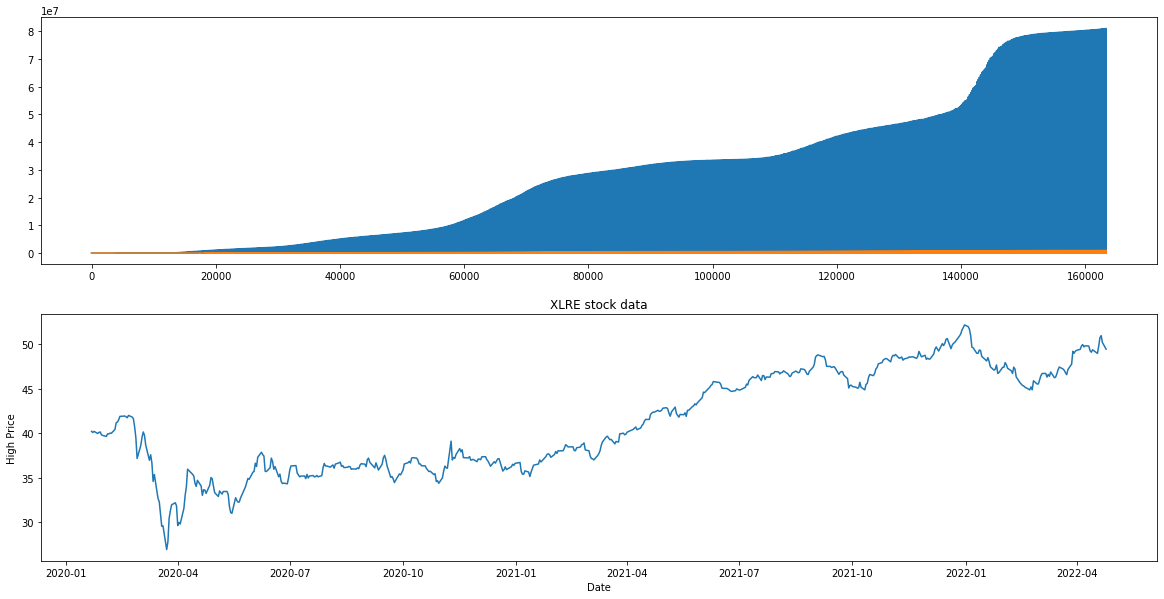

In [10]:
confirm_data=covid_final_dataset['Confirmed']
deaths_data= covid_final_dataset['Deaths']
XLRE_stock=stockdata_df.loc[stockdata_df['XLRE'] != 'NA']
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.plot(confirm_data)
plt.plot(deaths_data)


plt.subplot(2,1,2)
plt.plot(XLRE_stock['Date'], XLRE_stock['XLRE_high'])

plt.xlabel("Date")
plt.ylabel("High Price")
plt.title("XLRE stock data")
plt.show()

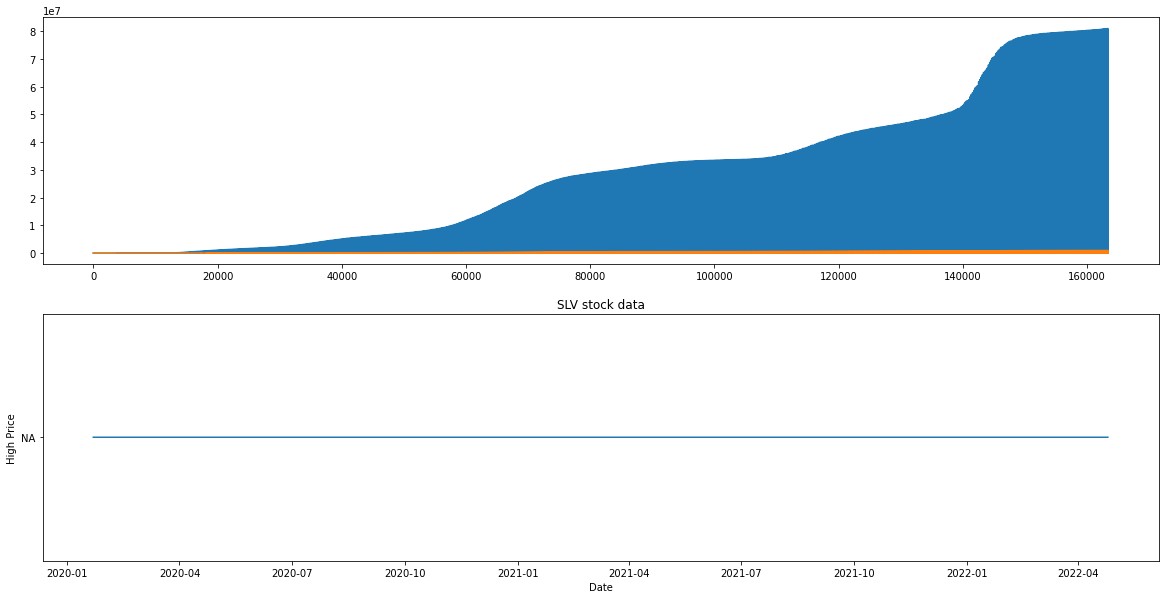

In [11]:
confirm_data=covid_final_dataset['Confirmed']
deaths_data= covid_final_dataset['Deaths']
SLV_stock=stockdata_df.loc[stockdata_df['SLV'] != 'NA']
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.plot(confirm_data)
plt.plot(deaths_data)


plt.subplot(2,1,2)
plt.plot(SLV_stock['Date'], XLRE_stock['SLV_high'])

plt.xlabel("Date")
plt.ylabel("High Price")
plt.title("SLV stock data")
plt.show()